# Rodríguez-Pérez, Q. et.al.2018(SRL-Under-Review) DataBase Comparasions

In [1]:
ENV["LINES"]=1000

1000

In [2]:
using DataFrames
using GLM
using Plots
using CSV

In [ ]:
using LaTeXStrings

In [ ]:
pyplot()

In [9]:
DataGolfo = CSV.read("BMPF-14junio2017Golfo.csv");
DataSUB = CSV.read("BMPF-14junio2017SUB.csv");
DataTMVB = CSV.read("BMPF-14junio2017TMVB.csv");

In [10]:
#DataTo[:Magnitud]=round.(dropna(DataTo[:Magnitud]),1);
DataGolfo[:Mw]=round.(collect(skipmissing(DataGolfo[:Mw])),1);
DataSUB[:Mw_]=round.(collect(skipmissing(DataSUB[:Mw])),1);
DataTMVB[:Mw]=round.(collect(skipmissing(DataTMVB[:Mw])),1);

In [16]:
sub1 = "MSZ"
golf = "GBC"
TM = "TMVB";

In [11]:
#SUB1 = DataSUB[.~isna.(DataSUB[:Caida_de_esfuerzos]),:]; # Remove Stress Drop -->> NA
SUB1=DataSUB[find(.~ismissing.(DataSUB[:,:stress_Drop_MPa])), :];

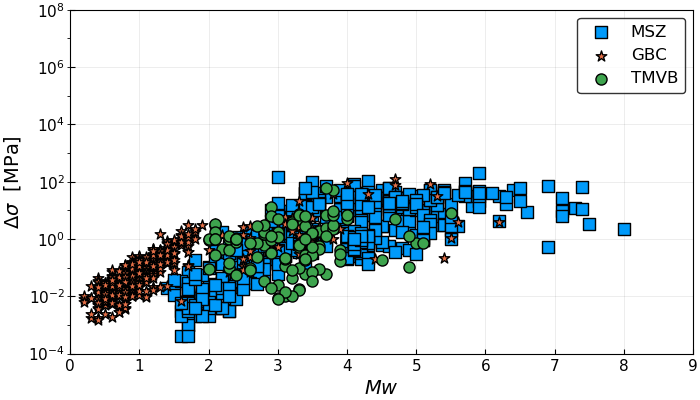

In [20]:
scatter((SUB1[:Mw]),(SUB1[:Stress_Drop_MPa]),lab=sub1, m=(8,:rect))
scatter!((DataGolfo[:Mw]),(DataGolfo[:Stress_Drop_MPa]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Mw]),(DataTMVB[:Stress_Drop_MPa]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\Delta \sigma$  [MPa]",xlims=(0,9),xticks=(0:1:9),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsStress.png",dpi=400,format="png")

In [21]:
#SUB2 = SUB1[.~isna.(SUB1[:freq_esc_]),:]; # Remove Stress Drop and Fc -->> NA
#TMVB1 = DataTMVB[.~isna.(DataTMVB[:freq_esc_]),:]; # # Remove Fc -->> NA
SUB2=SUB1[find(.~ismissing.(SUB1[:,:Fc_Hz])), :];
TMVB1=DataTMVB[find(.~ismissing.(DataTMVB[:,:Fc_Hz])), :];

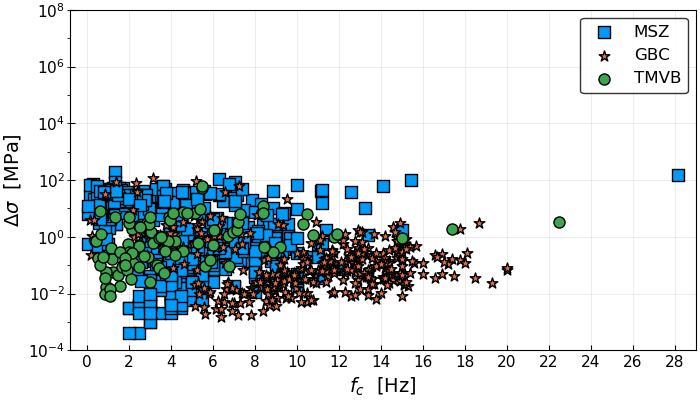

In [26]:
scatter((SUB2[:Fc_Hz]),(SUB2[:Stress_Drop_MPa]),yscale=:log10,lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Fc_Hz]),(DataGolfo[:Stress_Drop_MPa]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((TMVB1[:Fc_Hz]),(TMVB1[:Stress_Drop_MPa]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$f_{c}$  [Hz]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:2:30),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("FCvsStress.png",dpi=400,format="png")

In [28]:
#SUB3 = DataSUB[.~isna.(DataSUB[:Prof]),:]; # Remove Depth -->> NA
#Golfo1 = DataGolfo[.~isna.(DataGolfo[:Prof]),:];# Remove Depth -->> NA
SUB3=DataSUB[find(.~ismissing.(DataSUB[:,:Depth_km])), :];
Golfo1=DataGolfo[find(.~ismissing.(DataGolfo[:,:Depth_km])), :];

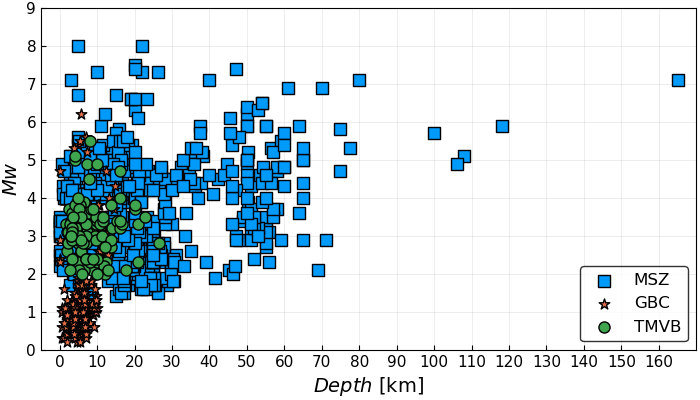

In [29]:
scatter((SUB3[:Depth_km]),(SUB3[:Mw]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Mw]),lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Depth_km]),(DataTMVB[:Mw]),lab=TM,m=(8,:circle),
    ylabel=L"$Mw$", xlabel=L"$Depth$ [km]",xticks=(0:10:180),ylims=(0,9),yticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsMw.pdf",dpi=400)

In [31]:
#SUB4 = SUB1[.~isna.(SUB1[:Prof]),:]; # Remove Stress Drop and Depth -->> NA
SUB4=SUB1[find(.~ismissing.(SUB1[:,:Depth_km])), :];

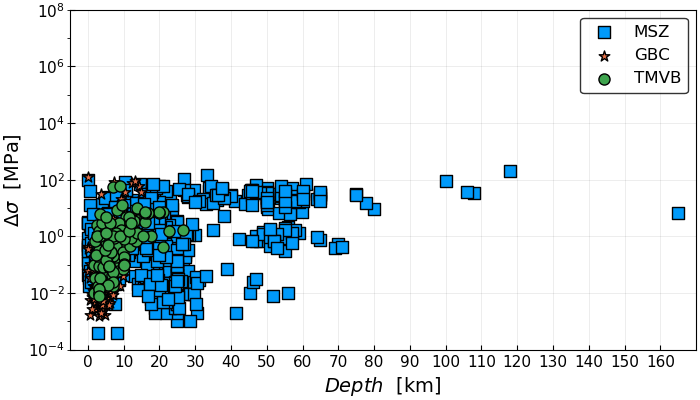

In [34]:
scatter((SUB4[:Depth_km]),(SUB4[:Stress_Drop_MPa]),yscale=:log10,lab=sub, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Stress_Drop_MPa]),yscale=:log10,lab=golf,m=(8,:star5))
scatter!((DataTMVB[:Depth_km]),(DataTMVB[:Stress_Drop_MPa]),yscale=:log10,lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$\Delta \sigma$  [MPa]",xticks=(0:10:180),ylims=(10e-5,10e7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsStress.png",dpi=400, format="png")

In [ ]:
#SUB5 = SUB3[.~isna.(SUB3[:Fo]),:]; # Remove Depth and Fc --->> NA
SUB5=SUB3[find(.~ismissing.(SUB3[:,:Fc_Hz])), :];

In [ ]:
scatter((SUB5[:Depth_km]),(SUB5[:Fc_Hz]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Fc_Hz]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_km]),(TMVB1[:Fc_Hz]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$f_{c}$  [Hz]",xticks=(0:10:180),yticks=(0:4:30),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14),)
#PyPlot.savefig("DepthvsFC.pdf",dpi=400)

In [ ]:
scatter((SUB5[:Depth_Hz]),(SUB5[:Radius_km]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Depth_Hz]),(Golfo1[:Radius_km]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_Hz]),(TMVB1[:Radius_km]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Radius$  [km]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsRadius.pdf",dpi=400)

In [ ]:
scatter((SUB5[:Depth_km]),(SUB5[:Displacement_m]),lab=sub, m=(8,:rect))
scatter!((Golfo1[:Depth_km]),(Golfo1[:Displacement_m]),lab=golf,m=(8,:star5))
scatter!((TMVB1[:Depth_km]),(TMVB1[:Displacement_m]),lab=TM,m=(8,:circle),
    xlabel=L"$Depth$  [km]", ylabel=L"$Displacement$  [m]",xticks=(0:10:180),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
#PyPlot.savefig("DepthvsDispla.pdf",dpi=400)

In [ ]:
# Er_Mo Figure
SUBErMo=DataSUB[find(.~ismissing.(DataSUB[:,:Er_Mo])), :];# Remove Er_Mo -->> NA
TMVErMo=DataTMVB[find(.~ismissing.(DataTMVB[:,:Er_Mo])), :];# Remove Er_Mo -->> NA

In [ ]:
scatter((SUBErMo[:Mw]),(SUBErMo[:Er_Mo]),lab=sub, m=(8,:rect))
scatter!((TMVErMo[:Mw]),(TMVErMo[:Er_Mo]),lab=TM,m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$\frac{E_{r}}{M_{o}}$",xlims=(1,9),xticks=(1:1:9),ylims=(10e-9,10e-2),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
yaxis!(:log10)
#PyPlot.savefig("MwvsErMo.pdf",dpi=400)